In [1]:
# pacotes e configurações gerais
import pandas as pd
import matplotlib as ml
import numpy as np
import math as mt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',20)

In [2]:
# Importação dos dados e verificação dos dados
data=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/daily-minimum-temperatures.csv")
data.dtypes
data=data.sort_values('Date')
data['Date'] = pd.to_datetime(data['Date'])
data['Year']=data['Date'].dt.year
data=data[['Year','Date','Temp']]
print(data.head(5))
print(data.tail(5))
print(data.describe())

   Year       Date  Temp
0  1981 1981-01-01  20.7
1  1981 1981-01-02  17.9
2  1981 1981-01-03  18.8
3  1981 1981-01-04  14.6
4  1981 1981-01-05  15.8
      Year       Date  Temp
3645  1990 1990-12-27  14.0
3646  1990 1990-12-28  13.6
3647  1990 1990-12-29  13.5
3648  1990 1990-12-30  15.7
3649  1990 1990-12-31  13.0
              Year         Temp
count  3650.000000  3650.000000
mean   1985.500000    11.177753
std       2.872675     4.071837
min    1981.000000     0.000000
25%    1983.000000     8.300000
50%    1985.500000    11.000000
75%    1988.000000    14.000000
max    1990.000000    26.300000


In [3]:
# gráfico com os dados
plot=pd.read_csv("C:/Users/Roger/OneDrive/ESPECIAL/IA006/python/daily-minimum-temperatures.csv",header=0,index_col=0)
plot.plot(figsize=(15,7))
ml.rcParams.update({'font.size': 10})
ml.pyplot.show()



<Figure size 1500x700 with 1 Axes>

In [4]:
#Transforma os dados em um problema supervisionado
data_windowed=data.copy()
data_windowed['C']=1
for k in range(1,31) :
     colum_name='T-'+str(k)
     data_windowed[colum_name]=data['Temp'].shift(k)
#elimina os 30 primeiros dias q não há como prever
data_windowed = data_windowed.iloc[30:]
data_windowed.describe()
data_windowed.head()

,Year,Date,Temp,C,T-1,T-2,T-3,T-4,T-5,T-6,...,T-21,T-22,T-23,T-24,T-25,T-26,T-27,T-28,T-29,T-30
30,1981,1981-01-31,15.4,1,15.1,15.5,17.2,19.4,18.7,16.5,...,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9,20.7
31,1981,1981-02-01,15.3,1,15.4,15.1,15.5,17.2,19.4,18.7,...,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8,17.9
32,1981,1981-02-02,18.8,1,15.3,15.4,15.1,15.5,17.2,19.4,...,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6,18.8
33,1981,1981-02-03,21.9,1,18.8,15.3,15.4,15.1,15.5,17.2,...,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8,14.6
34,1981,1981-02-04,19.9,1,21.9,18.8,15.3,15.4,15.1,15.5,...,21.5,16.7,13.3,16.2,20.0,21.8,17.4,15.8,15.8,15.8


Relatorio pelo erro médio.
<function show at 0x0DA6D3D8>
O número de atrasos que gerou o menor erro de validação foi:26.0
Erro Treino Medio:2.393983566149891
Erro Validação Medio:2.4435430707716153
Gerando estimativa pela média dos resutlados dos modelos.
O erro de teste utilizando a média de saída dos estimadores foi:2.2643739129258926
<function show at 0x0DA6D3D8>
Gerando estimativa utilizando todos os dados.
O erro de teste utilizando todos os dados de treino:2.2644659923663526
<function show at 0x0DA6D3D8>


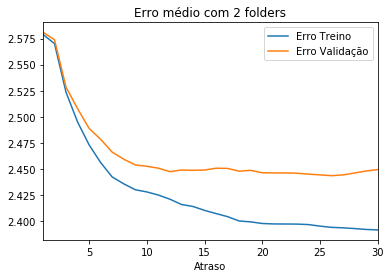

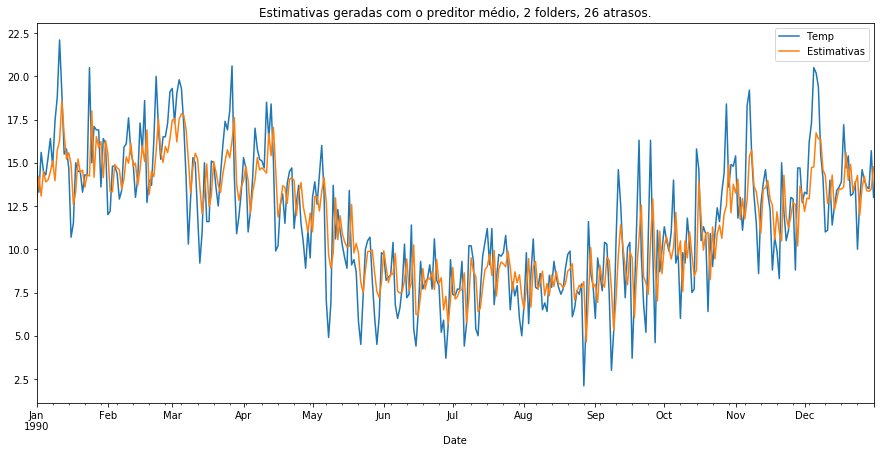

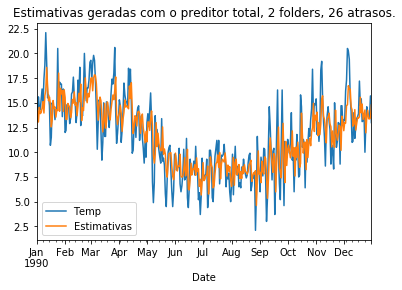

In [14]:
#configuraçõeos do método
ano_teste=1990
atrasos=30
lista_folders=[2]
#gera os dados de treino e teste
data_train=data_windowed[data_windowed['Year']!=ano_teste].copy()
data_test=data_windowed[data_windowed['Year']==ano_teste].copy()
#inicia os testes
for folders in lista_folders:
    #gerando uma coluna com o número de folds a partir de uma distribuição normal e inteiros
    np.random.seed(9001)
    data_train['fold'] = np.random.randint(1,folders+1,size=len(data_train))
    for f in range(1,folders+1):
        lenght=len(data_train[data_train['fold']==f])
    linha=0
    resultados=pd.DataFrame(columns=['Atraso','Folder','Dado Treino','Dado Validação','Matrix','Erro Treino','Erro Validação','Erro Teste'])
    y_tf=data_test.iloc[:,2:3].copy()
    for k in range(1,atrasos+1):
        #dados treino globais
        x_tf=data_test.iloc[:,3:k+4].copy()
        for f in range(1,folders+1):
            linha+=1
            resultados.loc[linha,'Atraso']=k
            resultados.loc[linha,'Folder']=f
            #Dados treino no folder
            x_train=data_train[data_train['fold']!=f]
            x_train=x_train.iloc[:,3:k+4].copy()
            y_train=data_train[data_train['fold']!=f]
            y_train=y_train.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Treino']=len(x_train)
            #Dados validação no folder
            x_valid=data_train[data_train['fold']==f]
            x_valid=x_valid.iloc[:,3:k+4].copy()
            y_valid=data_train[data_train['fold']==f]
            y_valid=y_valid.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Validação']=len(x_valid)
            #calculo da inversa
            xtx=(x_train.transpose()).dot(x_train)
            rank=np.linalg.matrix_rank(xtx.values)
            if rank==(k+1):
                message="Sim"
            else:
                message="Não"
            resultados.loc[linha,'Matrix']=message
            #cálculo do vetor w para regressão
            xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
            w=(xtxinv.dot(x_train.transpose())).dot(y_train)
            #erro treino
            yh_train=x_train.dot(w)
            error_train=mt.sqrt(((yh_train-y_train)**2).mean())
            resultados.loc[linha,'Erro Treino']=error_train
            #erro validação
            yh_valid=x_valid.dot(w)
            error_valid=mt.sqrt(((yh_valid-y_valid)**2).mean())
            resultados.loc[linha,'Erro Validação']=error_valid
            #erro teste
            yh_tf=x_tf.dot(w)
            error_tf=mt.sqrt(((yh_tf-y_tf)**2).mean())
            resultados.loc[linha,'Erro Teste']=error_tf
# leitura dos resultados
#     print(resultados[['Atraso','Folder','Erro Treino','Erro Validação','Erro Teste']])
#Relatorio pelo erro médio
    print("Relatorio pelo erro médio.")
    relatorio_lista=[]
    linha=0
    for k in range(1,atrasos+1):
        linha +=1
        x=resultados[resultados['Atraso']==k].copy()
        x=x.astype({'Erro Treino':float,'Erro Validação':float,'Erro Teste':float})
        x=x[['Atraso','Erro Treino','Erro Validação','Erro Teste']]
        relatorio_lista.append((x.mean()).values.tolist())
    relatorio_erro_medio=pd.DataFrame(relatorio_lista,columns=['Atraso','Erro Treino','Erro Validação','Erro Teste'])
    relatorio_erro_medio.plot(x='Atraso',y=['Erro Treino','Erro Validação'])
    title="Erro médio com {} folders".format(folders)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
    linha_dados=relatorio_erro_medio.loc[relatorio_erro_medio['Erro Validação'].idxmin()]
    print("O número de atrasos que gerou o menor erro de validação foi:{}".format(linha_dados['Atraso']))
    print("Erro Treino Medio:{}".format(linha_dados['Erro Treino']))
    print("Erro Validação Medio:{}".format(linha_dados['Erro Validação']))
# gerando estimativa pela média
    print("Gerando estimativa pela média dos resutlados dos modelos.")
    #como o atraso é covnertido em float temos que voltar ele para int 
    k=np.int(linha_dados['Atraso'])
    x_tf=data_test.iloc[:,3:k+4].copy()
    #truque para inicializar o dataframe contendo zeros
    y_teste_medio=y_tf.copy()
    y_teste_medio=y_teste_medio-y_tf
    for f in range(1,folders+1):
        #Dados testefolder
        x_train=data_train[data_train['fold']!=f]
        x_train=x_train.iloc[:,3:k+4].copy()
        y_train=data_train[data_train['fold']!=f]
        y_train=y_train.iloc[:,2:3].copy()
        #Dados validação no folder
        x_valid=data_train[data_train['fold']==f]
        x_valid=x_valid.iloc[:,3:k+4].copy()
        y_valid=data_train[data_train['fold']==f]
        y_valid=y_valid.iloc[:,2:3].copy()
        #calculo da inversa
        xtx=(x_train.transpose()).dot(x_train)
        #cálculo do vetor w para regressão
        xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
        w=(xtxinv.dot(x_train.transpose())).dot(y_train)
        #erro teste
        yh_tf=x_tf.dot(w)
        y_teste_medio = y_teste_medio+yh_tf.values
    y_teste_medio=y_teste_medio/folders
    error_teste_medio=mt.sqrt(((y_teste_medio-y_tf)**2).mean())
    print("O erro de teste utilizando a média de saída dos estimadores foi:{}".format(error_teste_medio))
    #gráfico
    grafico_medio=data_test.iloc[:,1:3].copy()
    grafico_medio['Estimativas']=y_teste_medio
    grafico_medio.plot(x='Date',y=['Temp','Estimativas'],figsize=(15,7))
    title="Estimativas geradas com o preditor médio, {} folders, {} atrasos.".format(folders,k)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
 #     estiamtiva com todos os dados
    print("Gerando estimativa utilizando todos os dados.")
    x_train=data_train.iloc[:,3:k+4].copy()
    y_train=data_train.iloc[:,2:3].copy()
    #calculo da inversa
    xtx=(x_train.transpose()).dot(x_train)
    #cálculo do vetor w para regressão
    xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
    w=(xtxinv.dot(x_train.transpose())).dot(y_train)
    #erro teste
    y_teste_todos=x_tf.dot(w)
    error_teste_todos=mt.sqrt(((y_teste_todos-y_tf)**2).mean())
    print("O erro de teste utilizando todos os dados de treino:{}".format(error_teste_todos))
    #gráfico
    grafico_todos=data_test.iloc[:,1:3].copy()
    grafico_todos['Estimativas']=y_teste_todos
    grafico_todos.plot(x='Date',y=['Temp','Estimativas'])
    title="Estimativas geradas com o preditor total, {} folders, {} atrasos.".format(folders,k)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
    

Relatorio pelo erro médio.
<function show at 0x0DA6D3D8>
O número de atrasos que gerou o menor erro de validação foi:26.0
Erro Treino Medio:2.4057661371134564
Erro Validação Medio:2.428317152916459
Gerando estimativa pela média dos resutlados dos modelos.
O erro de teste utilizando a média de saída dos estimadores foi:2.2645913030505738
<function show at 0x0DA6D3D8>
Gerando estimativa utilizando todos os dados.
O erro de teste utilizando todos os dados de treino:2.2644659923663526
<function show at 0x0DA6D3D8>


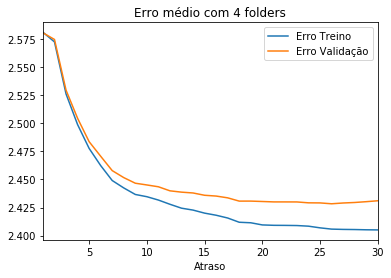

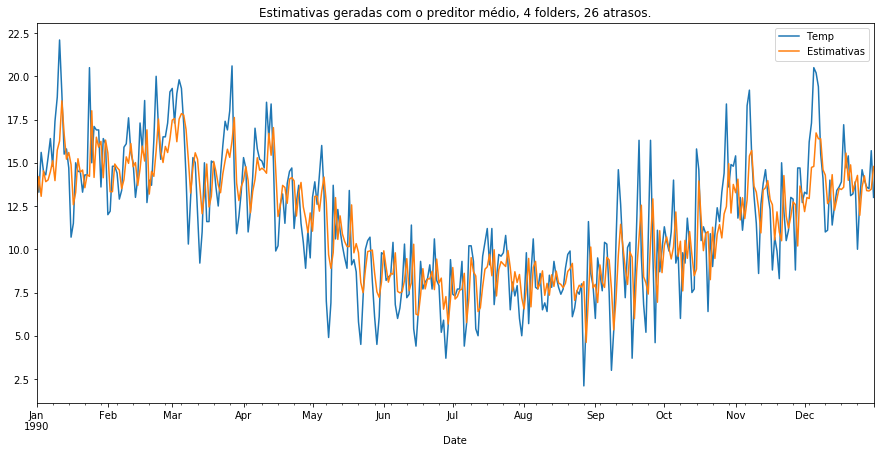

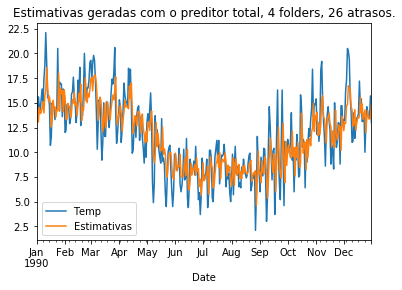

In [15]:
#configuraçõeos do método
ano_teste=1990
atrasos=30
lista_folders=[4]
#gera os dados de treino e teste
data_train=data_windowed[data_windowed['Year']!=ano_teste].copy()
data_test=data_windowed[data_windowed['Year']==ano_teste].copy()
#inicia os testes
for folders in lista_folders:
    #gerando uma coluna com o número de folds a partir de uma distribuição normal e inteiros
    np.random.seed(9001)
    data_train['fold'] = np.random.randint(1,folders+1,size=len(data_train))
    for f in range(1,folders+1):
        lenght=len(data_train[data_train['fold']==f])
    linha=0
    resultados=pd.DataFrame(columns=['Atraso','Folder','Dado Treino','Dado Validação','Matrix','Erro Treino','Erro Validação','Erro Teste'])
    y_tf=data_test.iloc[:,2:3].copy()
    for k in range(1,atrasos+1):
        #dados treino globais
        x_tf=data_test.iloc[:,3:k+4].copy()
        for f in range(1,folders+1):
            linha+=1
            resultados.loc[linha,'Atraso']=k
            resultados.loc[linha,'Folder']=f
            #Dados treino no folder
            x_train=data_train[data_train['fold']!=f]
            x_train=x_train.iloc[:,3:k+4].copy()
            y_train=data_train[data_train['fold']!=f]
            y_train=y_train.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Treino']=len(x_train)
            #Dados validação no folder
            x_valid=data_train[data_train['fold']==f]
            x_valid=x_valid.iloc[:,3:k+4].copy()
            y_valid=data_train[data_train['fold']==f]
            y_valid=y_valid.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Validação']=len(x_valid)
            #calculo da inversa
            xtx=(x_train.transpose()).dot(x_train)
            rank=np.linalg.matrix_rank(xtx.values)
            if rank==(k+1):
                message="Sim"
            else:
                message="Não"
            resultados.loc[linha,'Matrix']=message
            #cálculo do vetor w para regressão
            xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
            w=(xtxinv.dot(x_train.transpose())).dot(y_train)
            #erro treino
            yh_train=x_train.dot(w)
            error_train=mt.sqrt(((yh_train-y_train)**2).mean())
            resultados.loc[linha,'Erro Treino']=error_train
            #erro validação
            yh_valid=x_valid.dot(w)
            error_valid=mt.sqrt(((yh_valid-y_valid)**2).mean())
            resultados.loc[linha,'Erro Validação']=error_valid
            #erro teste
            yh_tf=x_tf.dot(w)
            error_tf=mt.sqrt(((yh_tf-y_tf)**2).mean())
            resultados.loc[linha,'Erro Teste']=error_tf
# leitura dos resultados
#     print(resultados[['Atraso','Folder','Erro Treino','Erro Validação','Erro Teste']])
#Relatorio pelo erro médio
    print("Relatorio pelo erro médio.")
    relatorio_lista=[]
    linha=0
    for k in range(1,atrasos+1):
        linha +=1
        x=resultados[resultados['Atraso']==k].copy()
        x=x.astype({'Erro Treino':float,'Erro Validação':float,'Erro Teste':float})
        x=x[['Atraso','Erro Treino','Erro Validação','Erro Teste']]
        relatorio_lista.append((x.mean()).values.tolist())
    relatorio_erro_medio=pd.DataFrame(relatorio_lista,columns=['Atraso','Erro Treino','Erro Validação','Erro Teste'])
    relatorio_erro_medio.plot(x='Atraso',y=['Erro Treino','Erro Validação'])
    title="Erro médio com {} folders".format(folders)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
    linha_dados=relatorio_erro_medio.loc[relatorio_erro_medio['Erro Validação'].idxmin()]
    print("O número de atrasos que gerou o menor erro de validação foi:{}".format(linha_dados['Atraso']))
    print("Erro Treino Medio:{}".format(linha_dados['Erro Treino']))
    print("Erro Validação Medio:{}".format(linha_dados['Erro Validação']))
# gerando estimativa pela média
    print("Gerando estimativa pela média dos resutlados dos modelos.")
    #como o atraso é covnertido em float temos que voltar ele para int 
    k=np.int(linha_dados['Atraso'])
    x_tf=data_test.iloc[:,3:k+4].copy()
    #truque para inicializar o dataframe contendo zeros
    y_teste_medio=y_tf.copy()
    y_teste_medio=y_teste_medio-y_tf
    for f in range(1,folders+1):
        #Dados testefolder
        x_train=data_train[data_train['fold']!=f]
        x_train=x_train.iloc[:,3:k+4].copy()
        y_train=data_train[data_train['fold']!=f]
        y_train=y_train.iloc[:,2:3].copy()
        #Dados validação no folder
        x_valid=data_train[data_train['fold']==f]
        x_valid=x_valid.iloc[:,3:k+4].copy()
        y_valid=data_train[data_train['fold']==f]
        y_valid=y_valid.iloc[:,2:3].copy()
        #calculo da inversa
        xtx=(x_train.transpose()).dot(x_train)
        #cálculo do vetor w para regressão
        xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
        w=(xtxinv.dot(x_train.transpose())).dot(y_train)
        #erro teste
        yh_tf=x_tf.dot(w)
        y_teste_medio = y_teste_medio+yh_tf.values
    y_teste_medio=y_teste_medio/folders
    error_teste_medio=mt.sqrt(((y_teste_medio-y_tf)**2).mean())
    print("O erro de teste utilizando a média de saída dos estimadores foi:{}".format(error_teste_medio))
    #gráfico
    grafico_medio=data_test.iloc[:,1:3].copy()
    grafico_medio['Estimativas']=y_teste_medio
    grafico_medio.plot(x='Date',y=['Temp','Estimativas'],figsize=(15,7))
    title="Estimativas geradas com o preditor médio, {} folders, {} atrasos.".format(folders,k)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
 #     estiamtiva com todos os dados
    print("Gerando estimativa utilizando todos os dados.")
    x_train=data_train.iloc[:,3:k+4].copy()
    y_train=data_train.iloc[:,2:3].copy()
    #calculo da inversa
    xtx=(x_train.transpose()).dot(x_train)
    #cálculo do vetor w para regressão
    xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
    w=(xtxinv.dot(x_train.transpose())).dot(y_train)
    #erro teste
    y_teste_todos=x_tf.dot(w)
    error_teste_todos=mt.sqrt(((y_teste_todos-y_tf)**2).mean())
    print("O erro de teste utilizando todos os dados de treino:{}".format(error_teste_todos))
    #gráfico
    grafico_todos=data_test.iloc[:,1:3].copy()
    grafico_todos['Estimativas']=y_teste_todos
    grafico_todos.plot(x='Date',y=['Temp','Estimativas'])
    title="Estimativas geradas com o preditor total, {} folders, {} atrasos.".format(folders,k)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
    

Relatorio pelo erro médio.
<function show at 0x0DA6D3D8>
O número de atrasos que gerou o menor erro de validação foi:18.0
Erro Treino Medio:2.413713126853261
Erro Validação Medio:2.4293935896049685
Gerando estimativa pela média dos resutlados dos modelos.
O erro de teste utilizando a média de saída dos estimadores foi:2.272655909074709
<function show at 0x0DA6D3D8>
Gerando estimativa utilizando todos os dados.
O erro de teste utilizando todos os dados de treino:2.272575769413609
<function show at 0x0DA6D3D8>
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0DA70540> (for post_execute):


ValueError: view limit minimum -36339.395000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

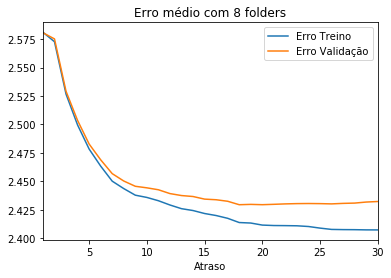

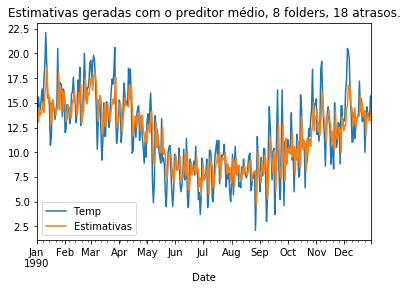

ValueError: view limit minimum -36339.395000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [9]:
#configuraçõeos do método
ano_teste=1990
atrasos=30
lista_folders=[8]
#gera os dados de treino e teste
data_train=data_windowed[data_windowed['Year']!=ano_teste].copy()
data_test=data_windowed[data_windowed['Year']==ano_teste].copy()
#inicia os testes
for folders in lista_folders:
    #gerando uma coluna com o número de folds a partir de uma distribuição normal e inteiros
    np.random.seed(9001)
    data_train['fold'] = np.random.randint(1,folders+1,size=len(data_train))
    for f in range(1,folders+1):
        lenght=len(data_train[data_train['fold']==f])
    linha=0
    resultados=pd.DataFrame(columns=['Atraso','Folder','Dado Treino','Dado Validação','Matrix','Erro Treino','Erro Validação','Erro Teste'])
    y_tf=data_test.iloc[:,2:3].copy()
    for k in range(1,atrasos+1):
        #dados treino globais
        x_tf=data_test.iloc[:,3:k+4].copy()
        for f in range(1,folders+1):
            linha+=1
            resultados.loc[linha,'Atraso']=k
            resultados.loc[linha,'Folder']=f
            #Dados treino no folder
            x_train=data_train[data_train['fold']!=f]
            x_train=x_train.iloc[:,3:k+4].copy()
            y_train=data_train[data_train['fold']!=f]
            y_train=y_train.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Treino']=len(x_train)
            #Dados validação no folder
            x_valid=data_train[data_train['fold']==f]
            x_valid=x_valid.iloc[:,3:k+4].copy()
            y_valid=data_train[data_train['fold']==f]
            y_valid=y_valid.iloc[:,2:3].copy()
            resultados.loc[linha,'Dado Validação']=len(x_valid)
            #calculo da inversa
            xtx=(x_train.transpose()).dot(x_train)
            rank=np.linalg.matrix_rank(xtx.values)
            if rank==(k+1):
                message="Sim"
            else:
                message="Não"
            resultados.loc[linha,'Matrix']=message
            #cálculo do vetor w para regressão
            xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
            w=(xtxinv.dot(x_train.transpose())).dot(y_train)
            #erro treino
            yh_train=x_train.dot(w)
            error_train=mt.sqrt(((yh_train-y_train)**2).mean())
            resultados.loc[linha,'Erro Treino']=error_train
            #erro validação
            yh_valid=x_valid.dot(w)
            error_valid=mt.sqrt(((yh_valid-y_valid)**2).mean())
            resultados.loc[linha,'Erro Validação']=error_valid
            #erro teste
            yh_tf=x_tf.dot(w)
            error_tf=mt.sqrt(((yh_tf-y_tf)**2).mean())
            resultados.loc[linha,'Erro Teste']=error_tf
# leitura dos resultados
#     print(resultados[['Atraso','Folder','Erro Treino','Erro Validação','Erro Teste']])
#Relatorio pelo erro médio
    print("Relatorio pelo erro médio.")
    relatorio_lista=[]
    linha=0
    for k in range(1,atrasos+1):
        linha +=1
        x=resultados[resultados['Atraso']==k].copy()
        x=x.astype({'Erro Treino':float,'Erro Validação':float,'Erro Teste':float})
        x=x[['Atraso','Erro Treino','Erro Validação','Erro Teste']]
        relatorio_lista.append((x.mean()).values.tolist())
    relatorio_erro_medio=pd.DataFrame(relatorio_lista,columns=['Atraso','Erro Treino','Erro Validação','Erro Teste'])
    relatorio_erro_medio.plot(x='Atraso',y=['Erro Treino','Erro Validação'])
    title="Erro médio com {} folders".format(folders)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
    linha_dados=relatorio_erro_medio.loc[relatorio_erro_medio['Erro Validação'].idxmin()]
    print("O número de atrasos que gerou o menor erro de validação foi:{}".format(linha_dados['Atraso']))
    print("Erro Treino Medio:{}".format(linha_dados['Erro Treino']))
    print("Erro Validação Medio:{}".format(linha_dados['Erro Validação']))
# gerando estimativa pela média
    print("Gerando estimativa pela média dos resutlados dos modelos.")
    #como o atraso é covnertido em float temos que voltar ele para int 
    k=np.int(linha_dados['Atraso'])
    x_tf=data_test.iloc[:,3:k+4].copy()
    #truque para inicializar o dataframe contendo zeros
    y_teste_medio=y_tf.copy()
    y_teste_medio=y_teste_medio-y_tf
    for f in range(1,folders+1):
        #Dados testefolder
        x_train=data_train[data_train['fold']!=f]
        x_train=x_train.iloc[:,3:k+4].copy()
        y_train=data_train[data_train['fold']!=f]
        y_train=y_train.iloc[:,2:3].copy()
        #Dados validação no folder
        x_valid=data_train[data_train['fold']==f]
        x_valid=x_valid.iloc[:,3:k+4].copy()
        y_valid=data_train[data_train['fold']==f]
        y_valid=y_valid.iloc[:,2:3].copy()
        #calculo da inversa
        xtx=(x_train.transpose()).dot(x_train)
        #cálculo do vetor w para regressão
        xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
        w=(xtxinv.dot(x_train.transpose())).dot(y_train)
        #erro teste
        yh_tf=x_tf.dot(w)
        y_teste_medio = y_teste_medio+yh_tf.values
    y_teste_medio=y_teste_medio/folders
    error_teste_medio=mt.sqrt(((y_teste_medio-y_tf)**2).mean())
    print("O erro de teste utilizando a média de saída dos estimadores foi:{}".format(error_teste_medio))
    #gráfico
    grafico_medio=data_test.iloc[:,1:3].copy()
    grafico_medio['Estimativas']=y_teste_medio
    grafico_medio.plot(x='Date',y=['Temp','Estimativas'])
    title="Estimativas geradas com o preditor médio, {} folders, {} atrasos.".format(folders,k)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
 #     estiamtiva com todos os dados
    print("Gerando estimativa utilizando todos os dados.")
    x_train=data_train.iloc[:,3:k+4].copy()
    y_train=data_train.iloc[:,2:3].copy()
    #calculo da inversa
    xtx=(x_train.transpose()).dot(x_train)
    #cálculo do vetor w para regressão
    xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
    w=(xtxinv.dot(x_train.transpose())).dot(y_train)
    #erro teste
    y_teste_todos=x_tf.dot(w)
    error_teste_todos=mt.sqrt(((y_teste_todos-y_tf)**2).mean())
    print("O erro de teste utilizando todos os dados de treino:{}".format(error_teste_todos))
    #gráfico
    grafico_todos=data_test.iloc[:,1:3].copy()
    grafico_todos['Estimativas']=y_teste_todos
    grafico_todos.plot(x='Date',y=['Temp','Estimativas'])
    title="Estimativas geradas com o preditor total, {} folders, {} atrasos.".format(folders,k)
    ml.pyplot.title(title)
    print(ml.pyplot.show)
    

In [6]:
for ano in range(1981,1991):
    print(ano)
    data_train=data_windowed[data_windowed['Year']!=ano].copy()
    data_test=data_windowed[data_windowed['Year']==ano].copy()
    x_train=data_train.iloc[:,3:34].copy()
    y_train=data_train['Temp'].copy()
    
    x_test=data_test.iloc[:,3:34].copy()
    y_test=data_test['Temp'].copy()
    
    xtx=(x_train.transpose()).dot(x_train)
    xtxinv=pd.DataFrame(np.linalg.pinv(xtx.values), xtx.columns, xtx.index)
    w=(xtxinv.dot(x_train.transpose())).dot(y_train)
    
    y_train_estimado=(x_train).dot(w)
    error_train=mt.sqrt(((y_train_estimado-y_train)**2).mean())
    print("erro treino {}".format(error_train))
    y_test_estimado=(x_test.values).dot(w.values)
    error_test=mt.sqrt(((y_test_estimado-y_test)**2).mean())
    print("erro teste {}".format(error_test))

1981
erro treino 2.3950733795682644
erro teste 2.395415791820079
1982
erro treino 2.363011701317136
erro teste 2.680088597647611
1983
erro treino 2.382853914906737
erro teste 2.5101078296233683
1984
erro treino 2.3820921201245295
erro teste 2.509802548890509
1985
erro treino 2.3977623829837946
erro teste 2.369084712735388
1986
erro treino 2.3942045020458838
erro teste 2.4049666157759577
1987
erro treino 2.395037705657323
erro teste 2.401123705023188
1988
erro treino 2.391627666183208
erro teste 2.424321801644336
1989
erro treino 2.4198318300660926
erro teste 2.161401117646023
1990
erro treino 2.408973471425526
erro teste 2.2655007149453508
